<center> <font size=6> Kaggle challenge </font> </center>
<center> <i> Team ?? </i> </center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import modules</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Information-about-the-dataset" data-toc-modified-id="Information-about-the-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Information about the dataset</a></span><ul class="toc-item"><li><span><a href="#Dataset-Features" data-toc-modified-id="Dataset-Features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dataset Features</a></span></li><li><span><a href="#Class-Labels-(8-Classes)" data-toc-modified-id="Class-Labels-(8-Classes)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Class Labels (8 Classes)</a></span></li><li><span><a href="#Profile-Report" data-toc-modified-id="Profile-Report-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Profile Report</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Date" data-toc-modified-id="Date-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Date</a></span><ul class="toc-item"><li><span><a href="#Regex-parsing-for-date-extraction" data-toc-modified-id="Regex-parsing-for-date-extraction-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Regex parsing for date extraction</a></span></li><li><span><a href="#Applying-transformation-to-the-dataset" data-toc-modified-id="Applying-transformation-to-the-dataset-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Applying transformation to the dataset</a></span></li></ul></li></ul></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Analysis</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>LightGBM</a></span><ul class="toc-item"><li><span><a href="#NA-Cleaning" data-toc-modified-id="NA-Cleaning-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>NA Cleaning</a></span></li><li><span><a href="#For-one-class-first" data-toc-modified-id="For-one-class-first-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>For one class first</a></span></li></ul></li></ul></div>

# Import modules

In [77]:
import os

import numpy as np

import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

import lightgbm as lgb

# Import data

In [2]:
os.listdir()

['skeleton_code_ml.py',
 'LICENSE',
 'profile_report.html',
 'sample_submission_ml.csv',
 '2EL1730-ML-Kaggle_Challenge_Description.pdf',
 'test_ml.csv',
 'README.md',
 'train_ml.csv',
 '.gitignore',
 '.ipynb_checkpoints',
 '2EL1730-ML-Kaggle_Challenge_Instructions.pdf',
 '.git',
 'kaggle_challenge.ipynb']

In [3]:
df = pd.read_csv('train_ml.csv').drop(columns=['Unnamed: 0'])
df_test = pd.read_csv('test_ml.csv').drop(columns=['Unnamed: 0'])

df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,updates,personal,promotions,forums,purchases,travel,spam,social
0,"Mon, 15 Oct 2018 08:03:09 +0000 (UTC)",researchgatemail,net,0,0,multipart/alternative,4,28,0,1,47.0,25556,0,1,0,0,0,0,0,1
1,"Thu, 17 Apr 2014 09:12:33 -0700 (PDT)",no-ip,com,0,0,multipart/alternative,6,32,0,0,46.0,19930,1,1,0,0,0,0,0,0
2,"Thu, 27 Oct 2016 01:36:28 +0000",mail,goodreads.com,0,0,multipart/mixed,0,0,0,0,21.0,4,0,1,0,0,0,0,0,1
3,"Fri, 16 Oct 2020 08:06:31 +0000 (GMT)",insideapple,apple.com,0,0,multipart/alternative,108,171,0,0,52.0,96568,0,0,1,0,0,0,0,0
4,"Thu, 02 Jul 2015 10:16:46 +0000",twitter,com,0,0,multipart/alternative,20,166,0,0,81.0,95131,0,1,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39671 entries, 0 to 39670
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              39671 non-null  object 
 1   org               37994 non-null  object 
 2   tld               37992 non-null  object 
 3   ccs               39671 non-null  int64  
 4   bcced             39671 non-null  int64  
 5   mail_type         39573 non-null  object 
 6   images            39671 non-null  int64  
 7   urls              39671 non-null  int64  
 8   salutations       39671 non-null  int64  
 9   designation       39671 non-null  int64  
 10  chars_in_subject  39660 non-null  float64
 11  chars_in_body     39671 non-null  int64  
 12  updates           39671 non-null  int64  
 13  personal          39671 non-null  int64  
 14  promotions        39671 non-null  int64  
 15  forums            39671 non-null  int64  
 16  purchases         39671 non-null  int64 

# Information about the dataset

## Dataset Features

- date - unix style date format, date-time on which the email was received, e.g. Sat, 2 Jul 2016 11:02:58 +0530
- org - organisation of the sender, e.g. centralesupelec, facebook, and google.
- tld - top level domain of the organisation, eg. com, ac.in, fr, and org.
- ccs - number of emails cced with this email, e.g. 0, 2, and 10.
- bcced - is the receiver bcc'd in the email. Can take two values: 0 or 1.
- mail_type - type of the mail body, e.g. text/plain and text/html.
- images - number of images in the mail body, e.g. 0, 1, and 100.
- urls - number of urls in the mail body, e.g. 0, 1, and 50.
- salutations - is salutation used in the email? Either 0 or 1.
- designation - is designation of the sender mentioned in the email. Either 0 or 1.
- chars_in_subject - number of characters in the mail subject, e.g. 0, 1, and 10.
- chars_in_body - number of characters in the mail body, e.g. 10 and 10000.
- labels - last eight columns represent eight classes, 0 means that label is not present for this row and 1 means that label is present, multiple label columsn can be 1. Label columns are only present in train.csv. test.csv has features only.

## Class Labels (8 Classes)
- updates
- personal
- promotions
- forums
- purchases
- travel
- spam
- social

In [5]:
df.isnull().sum()

date                   0
org                 1677
tld                 1679
ccs                    0
bcced                  0
mail_type             98
images                 0
urls                   0
salutations            0
designation            0
chars_in_subject      11
chars_in_body          0
updates                0
personal               0
promotions             0
forums                 0
purchases              0
travel                 0
spam                   0
social                 0
dtype: int64

## Profile Report

In [6]:
# profile = ProfileReport(df, title='Profiling Report')
# profile.to_file("profile_report.html")

# Preprocessing

## Date

### Regex parsing for date extraction

For one example:

In [7]:
string = "Mon, 15 Oct 2018 08:03:09 +0000 (UTC)"
pattern = r'(\d{1,2}.*\d{2}:\d{2}:\d{2}) ([+-]\d{2}\d{2})'
ans = re.search(pattern, string)

In [8]:
date = ''.join([ans.group(1), ans.group(2)])
date

'15 Oct 2018 08:03:09+0000'

In [9]:
pd.to_datetime(date)

Timestamp('2018-10-15 08:03:09+0000', tz='UTC')

### Applying transformation to the dataset

Now let's apply the transformation to the dataset:

In [10]:
def format_date(row):
    pattern = r'(\d{1,2}.*\d{2}:\d{2}:\d{2}) ([+-]\d{2}\d{2})'
    
    ans = re.search(pattern, string=row)
    
    if ans:
        if ans.group(1)[1] == ' ':
            return ''.join(['0', ans.group(1), ans.group(2)])
        else:
            return ''.join([ans.group(1), ans.group(2)])
    else:
        return np.nan

In [11]:
df['date'] = pd.to_datetime(df['date'].apply(format_date), utc=True)
df['date']

0       2018-10-15 08:03:09+00:00
1       2014-04-17 16:12:33+00:00
2       2016-10-27 01:36:28+00:00
3       2020-10-16 08:06:31+00:00
4       2015-07-02 10:16:46+00:00
                   ...           
39666   2019-10-08 18:58:39+00:00
39667   2018-04-03 10:37:48+00:00
39668   2017-04-03 13:25:47+00:00
39669   2018-06-14 00:46:51+00:00
39670   2020-04-17 14:06:27+00:00
Name: date, Length: 39671, dtype: datetime64[ns, UTC]

In [12]:
df['date'].iloc[0]

Timestamp('2018-10-15 08:03:09+0000', tz='UTC')

In [13]:
df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,updates,personal,promotions,forums,purchases,travel,spam,social
0,2018-10-15 08:03:09+00:00,researchgatemail,net,0,0,multipart/alternative,4,28,0,1,47.0,25556,0,1,0,0,0,0,0,1
1,2014-04-17 16:12:33+00:00,no-ip,com,0,0,multipart/alternative,6,32,0,0,46.0,19930,1,1,0,0,0,0,0,0
2,2016-10-27 01:36:28+00:00,mail,goodreads.com,0,0,multipart/mixed,0,0,0,0,21.0,4,0,1,0,0,0,0,0,1
3,2020-10-16 08:06:31+00:00,insideapple,apple.com,0,0,multipart/alternative,108,171,0,0,52.0,96568,0,0,1,0,0,0,0,0
4,2015-07-02 10:16:46+00:00,twitter,com,0,0,multipart/alternative,20,166,0,0,81.0,95131,0,1,0,0,0,0,0,1


In [14]:
df['date_day'] = df['date'].dt.date
df['date_day']

0        2018-10-15
1        2014-04-17
2        2016-10-27
3        2020-10-16
4        2015-07-02
            ...    
39666    2019-10-08
39667    2018-04-03
39668    2017-04-03
39669    2018-06-14
39670    2020-04-17
Name: date_day, Length: 39671, dtype: object

In [15]:
df['date_day'].value_counts()

2017-04-07    95
2017-04-06    86
2016-07-06    71
2016-07-08    58
2016-07-09    56
              ..
2014-01-15     1
2013-08-17     1
2014-05-18     1
2012-12-01     1
2012-06-23     1
Name: date_day, Length: 2922, dtype: int64

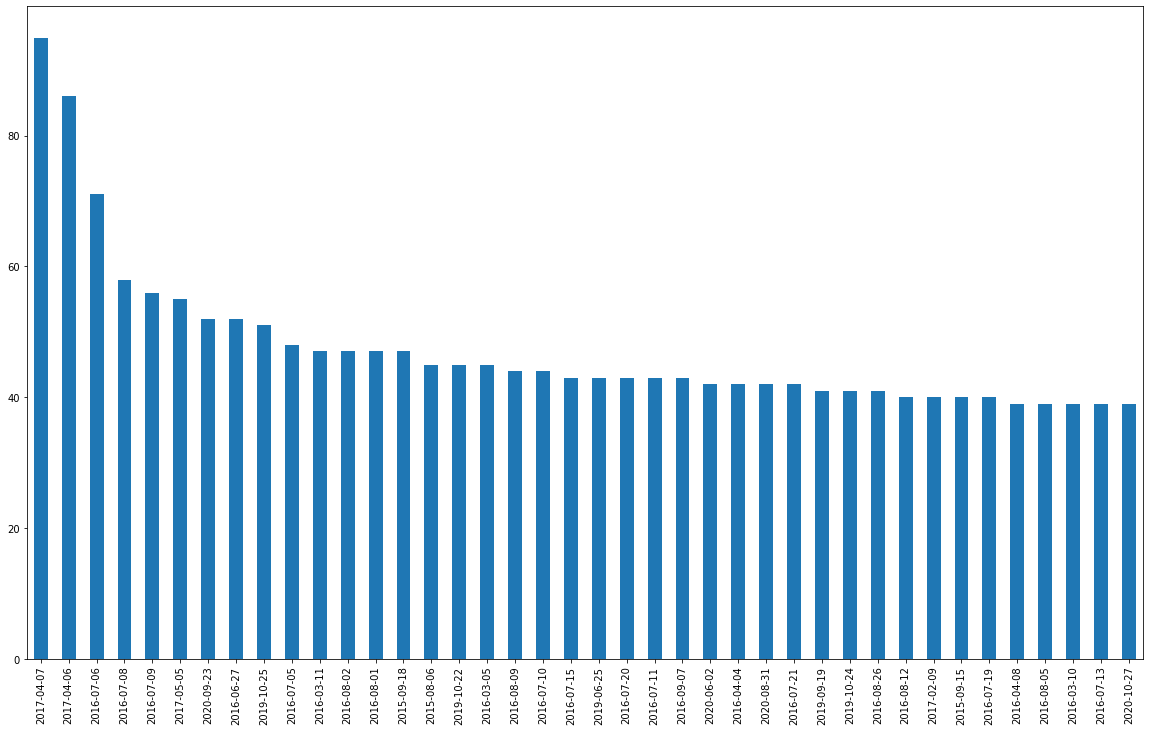

In [16]:
plt.figure(figsize=(20,12))
df['date_day'].value_counts().head(40).plot.bar();

# Data Analysis

In [17]:
df.columns

Index(['date', 'org', 'tld', 'ccs', 'bcced', 'mail_type', 'images', 'urls',
       'salutations', 'designation', 'chars_in_subject', 'chars_in_body',
       'updates', 'personal', 'promotions', 'forums', 'purchases', 'travel',
       'spam', 'social', 'date_day'],
      dtype='object')

In [18]:
list_classes = ['updates', 'personal', 'promotions', 'forums', 'purchases', 'travel',
       'spam', 'social']

In [19]:
df[list_classes].idxmax(axis=1).value_counts()

personal      21767
updates       14377
promotions     1747
forums         1361
social          419
dtype: int64

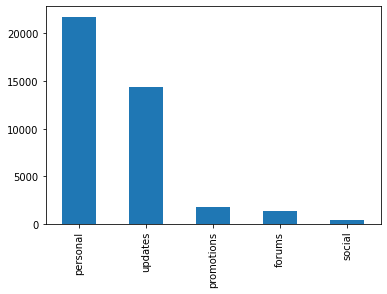

In [20]:
df[list_classes].idxmax(axis=1).value_counts().plot.bar();

In [21]:
numerical_features = ["ccs", "images", "urls", "chars_in_subject", "chars_in_body"]
df[numerical_features]

,ccs,images,urls,chars_in_subject,chars_in_body
0,0,4,28,47.0,25556
1,0,6,32,46.0,19930
2,0,0,0,21.0,4
3,0,108,171,52.0,96568
4,0,20,166,81.0,95131
...,...,...,...,...,...
39666,0,11,31,32.0,44952
39667,0,0,0,57.0,721
39668,0,0,0,28.0,571
39669,0,27,136,24.0,92847


In [22]:
df[numerical_features].describe()

,ccs,images,urls,chars_in_subject,chars_in_body
count,39671.000000,39671.000000,39671.000000,39660.000000,3.967100e+04
mean,0.378967,9.806332,36.731088,51.442032,2.321781e+05
std,2.530353,440.393286,144.379127,34.142227,2.251044e+06
min,0.000000,0.000000,0.000000,0.000000,4.000000e+00
25%,0.000000,0.000000,4.500000,31.000000,4.903000e+03
50%,0.000000,2.000000,18.000000,43.000000,2.000500e+04
75%,0.000000,9.000000,47.000000,63.000000,4.800100e+04
max,155.000000,83480.000000,21540.000000,528.000000,7.438108e+07


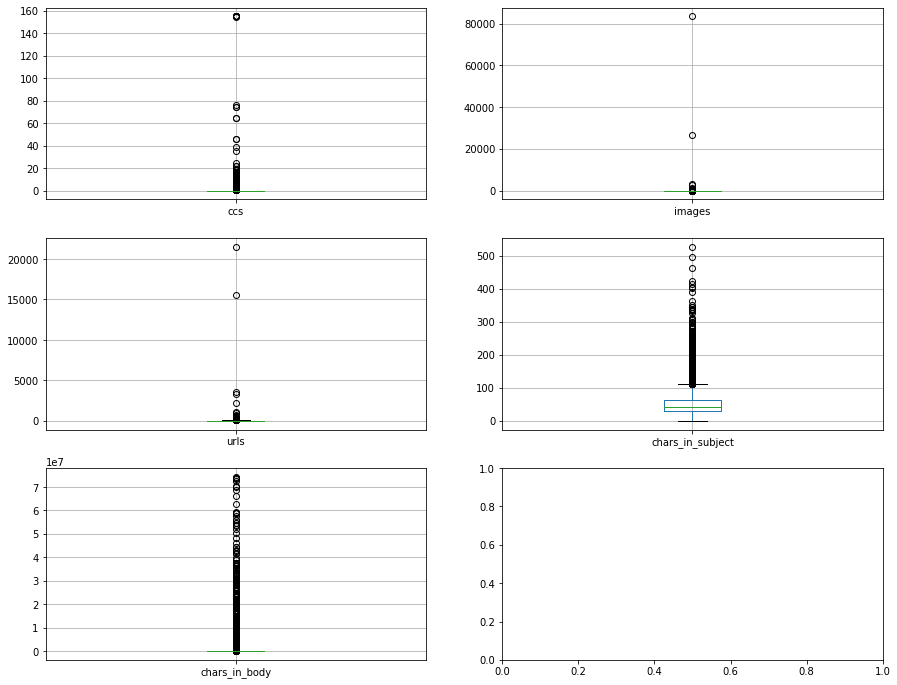

In [23]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12), sharey=False)

for idx, (col, ax) in enumerate(zip(numerical_features, axs.ravel())):
    df[numerical_features].boxplot(col, ax=ax)

In [24]:
df['class'] = df[list_classes].idxmax(axis=1)
df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,...,updates,personal,promotions,forums,purchases,travel,spam,social,date_day,class
0,2018-10-15 08:03:09+00:00,researchgatemail,net,0,0,multipart/alternative,4,28,0,1,...,0,1,0,0,0,0,0,1,2018-10-15,personal
1,2014-04-17 16:12:33+00:00,no-ip,com,0,0,multipart/alternative,6,32,0,0,...,1,1,0,0,0,0,0,0,2014-04-17,updates
2,2016-10-27 01:36:28+00:00,mail,goodreads.com,0,0,multipart/mixed,0,0,0,0,...,0,1,0,0,0,0,0,1,2016-10-27,personal
3,2020-10-16 08:06:31+00:00,insideapple,apple.com,0,0,multipart/alternative,108,171,0,0,...,0,0,1,0,0,0,0,0,2020-10-16,promotions
4,2015-07-02 10:16:46+00:00,twitter,com,0,0,multipart/alternative,20,166,0,0,...,0,1,0,0,0,0,0,1,2015-07-02,personal


In [25]:
# sns.pairplot(df[numerical_features + ['class']], hue='class');

# LightGBM

## NA Cleaning

In [33]:
len(df)

39671

In [31]:
df.isna().sum()

date                  59
org                 1677
tld                 1679
ccs                    0
bcced                  0
mail_type             98
images                 0
urls                   0
salutations            0
designation            0
chars_in_subject      11
chars_in_body          0
updates                0
personal               0
promotions             0
forums                 0
purchases              0
travel                 0
spam                   0
social                 0
date_day              59
class                  0
dtype: int64

In [32]:
len(df.dropna(how='any'))

37893

In [34]:
len(df.dropna(how='any')) / len(df)

0.9551813667414484

In [35]:
df = df.dropna(how='any')
df.isna().sum()

date                0
org                 0
tld                 0
ccs                 0
bcced               0
mail_type           0
images              0
urls                0
salutations         0
designation         0
chars_in_subject    0
chars_in_body       0
updates             0
personal            0
promotions          0
forums              0
purchases           0
travel              0
spam                0
social              0
date_day            0
class               0
dtype: int64

## For one class first

In [82]:
categorical_cols = ["date", "org", "tld", "mail_type", "date_day"]

In [83]:
ordinal_encoder = OrdinalEncoder()
df[categorical_cols] = ordinal_encoder.fit_transform(df[categorical_cols])

In [84]:
X.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,date_day
0,26329.0,712.0,172.0,0,0,3.0,4,28,0,1,47.0,25556,2102.0
1,1063.0,598.0,59.0,0,0,3.0,6,32,0,0,46.0,19930,466.0
2,12999.0,511.0,108.0,0,0,4.0,0,0,0,0,21.0,4,1385.0
3,36079.0,461.0,24.0,0,0,3.0,108,171,0,0,52.0,96568,2834.0
4,3608.0,859.0,59.0,0,0,3.0,20,166,0,0,81.0,95131,903.0


In [85]:
X = df.drop(columns=list_classes+["class"])
y = df[list_classes[0]]

In [86]:
y

0        0
1        1
2        0
3        0
4        0
        ..
39665    1
39666    0
39668    0
39669    1
39670    1
Name: updates, Length: 37893, dtype: int64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y)

In [88]:
y_test.sum(axis=0) / (y_train.sum(axis=0) + y_test.sum(axis=0))

0.20001539764416043

>**Categorical Feature Support**
>
>- LightGBM offers good accuracy with integer-encoded categorical features. LightGBM applies Fisher (1958) to find the optimal split over categories as described here. This often performs better than one-hot encoding.
>- Use categorical_feature to specify the categorical features. Refer to the parameter categorical_feature in Parameters.
>- Categorical features must be encoded as non-negative integers (int) less than Int32.MaxValue (2147483647). It is best to use a contiguous range of integers started from zero.
>- Use min_data_per_group, cat_smooth to deal with over-fitting (when #data is small or #category is large).
>- For a categorical feature with high cardinality (#category is large), it often works best to treat the feature as numeric, either by simply ignoring the categorical interpretation of the integers or by embedding the categories in a low-dimensional numeric space.

In [103]:
d_train = lgb.Dataset(
    X_train, 
    label=y_train, 
    feature_name='auto',
    categorical_feature=["date", "mail_type", "date_day"]
)
d_train

In [104]:
param = {'num_leaves': 31, 'objective': 'binary'}
param['metric'] = 'auc'

clf = lgb.train(params, d_train)

[LightGBM] [Info] Number of positive: 10391, number of negative: 19923
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3905
[LightGBM] [Info] Number of data points in the train set: 30314, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342779 -> initscore=-0.650935
[LightGBM] [Info] Start training from score -0.650935


/Users/Tony/opt/anaconda3/envs/ml/lib/python3.8/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [105]:
y_pred = clf.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)


y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [106]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 7579}